<a href="https://colab.research.google.com/github/Hashehri/hashehri/blob/main/Arabic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data from

https://www.kaggle.com/saurabhshahane/arabic-classification 


https://data.mendeley.com/datasets/v524p5dhpj/2


Code from 

https://www.kaggle.com/khalilalla/textmining-project

Go to the session storage, click upload

Locate the file and upload it, there will be a notification that the file will be deleted when the session ends.


In [ ]:
import pandas as pd
df = pd.read_csv('/content/arabic_dataset_classifiction.csv', encoding = 'utf8')

In [ ]:
import numpy as np
print(np.sum(df.isnull().any(axis=1)))
clean_df = df.dropna()
print(np.sum(clean_df.isnull().any(axis=1)))

2939
0


In [ ]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.isri import ISRIStemmer

import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_hashtag(df, col = 'text'):
    for letter in r'#.][!XR':
        df[col] = df[col].astype(str).str.replace(letter,'', regex=True)

remove_hashtag(clean_df)
clean_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,targe
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0
...,...,...
111723,اللاعب تأخر في العودة إلى التداريب والمدرب غاض...,4
111724,المشرف العام لحسنية أكادير قال إنه سيغادر الفر...,4
111725,نسب إليه نتائج الوداد وصحوة الرجاء وآخر صيحاته...,4
111726,ستحتضن الرباط في الفترة مابين يوليوز المقبل دو...,4


In [ ]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [ ]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [ ]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [ ]:
def processDocument(doc, stemmer): 

    #Replace @username with empty string
    doc = re.sub(r'@[^\s]+', ' ', doc)
    doc = re.sub(r'_', ' ', doc)
    doc = re.sub(r'\n', ' ', doc)
    doc = re.sub(r'[a-z,A-Z]', '', doc)
    doc = re.sub(r'\d', '', doc)
    #Convert www.* or https?://* to " "
    doc = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',doc)
    #Replace #word with word
    doc = re.sub(r'#([^\s]+)', r'\1', doc)
    # remove punctuations
    doc= remove_punctuations(doc)
    # normalize the tweet
    doc= normalize_arabic(doc)
    # remove repeated letters
    doc=remove_repeating_char(doc)
    #stemming
    doc = stemmer.stem(doc)
    
    return doc

In [ ]:
stemmer = ISRIStemmer()
clean_df["text"] = clean_df['text'].apply(lambda x: processDocument(x, stemmer))
clean_df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,targe
0,بين استوديوهات ورزازات وصحراء مرزوكه واثار ولي...,0
1,قرت النجمه الامريكيه اوبرا وينفري الا يقتصر عم...,0
2,اخبارنا المغربيه الوزاني تصوير الشملالي الهب ا...,0
3,اخبارنا المغربيه قال ابراهيم الراشدي محامي سعد...,0
4,تزال صناعه الجلود في المغرب تبع الطريقه التقلي...,0
...,...,...
111723,اعب تاخر في العوده الي التداريب والمدرب غاضب و...,4
111724,مشرف العام لحسنيه اكادير قال انه سيغادر الفريق...,4
111725,نسب اليه نتائج الوداد وصحوه الرجاء واخر صيحاته...,4
111726,ستحتضن الرباط في الفتره مابين يوليوز المقبل دو...,4


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
clean_df["text"] = clean_df["text"].apply(tokenizer.tokenize)
clean_df

TypeError: ignored

In [ ]:
stopwords_list = stopwords.words('arabic')

clean_df["text"] = clean_df["text"].apply(lambda x: [item for item in x if item not in stopwords_list])
clean_df



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,targe
0,"[استوديوهات, ورزازات, وصحراء, مرزوكه, واثار, و...",0
1,"[قرت, النجمه, الامريكيه, اوبرا, وينفري, الا, ي...",0
2,"[اخبارنا, المغربيه, الوزاني, تصوير, الشملالي, ...",0
3,"[اخبارنا, المغربيه, قال, ابراهيم, الراشدي, محا...",0
4,"[تزال, صناعه, الجلود, المغرب, تبع, الطريقه, ال...",0
...,...,...
111723,"[اعب, تاخر, العوده, الي, التداريب, والمدرب, غا...",4
111724,"[مشرف, العام, لحسنيه, اكادير, قال, انه, سيغادر...",4
111725,"[نسب, اليه, نتائج, الوداد, وصحوه, الرجاء, واخر...",4
111726,"[ستحتضن, الرباط, الفتره, مابين, يوليوز, المقبل...",4


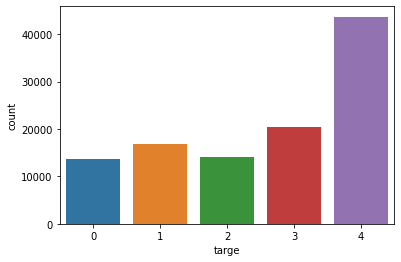

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.countplot(data= clean_df, x = "targe")
plt.show()

In [ ]:
def countPropetries(df):
    all_words = [word for tokens in df["text"] for word in tokens]
    sentence_lengths = [len(tokens) for tokens in df["text"]]

    VOCAB = sorted(list(set(all_words)))

    print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
    print("Max sentence length is %s" % np.max(sentence_lengths))
    return all_words

In [ ]:
culture_df = clean_df.loc[clean_df["targe"] == 0]
diverse_df = clean_df.loc[clean_df["targe"] == 1]
economy_df = clean_df.loc[clean_df["targe"] == 2]
politic_df = clean_df.loc[clean_df["targe"] == 3]
sport_df = clean_df.loc[clean_df["targe"] == 4]

print("Culture : ")
culture_words = countPropetries(culture_df)
print("\nDiverse : ")
diverse_words = countPropetries(diverse_df)
print("\nEconomy : ")
economy_words = countPropetries(economy_df)
print("\nPolitics : ")
politic_words = countPropetries(politic_df)
print("\nSport : ")
sport_words = countPropetries(sport_df)

Culture : 
3222605 words total, with a vocabulary size of 171472
Max sentence length is 3796

Diverse : 
3941414 words total, with a vocabulary size of 127260
Max sentence length is 1508

Economy : 
3160382 words total, with a vocabulary size of 110864
Max sentence length is 2748

Politics : 
5022092 words total, with a vocabulary size of 165119
Max sentence length is 4048

Sport : 
9080158 words total, with a vocabulary size of 181523
Max sentence length is 2119


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

y = clean_df['targe']
X = clean_df['text']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features =10000)


In [ ]:
model = Pipeline([
                    ("tfidf", word_vectorizer), # convert words to numbers using tfidf
                    ("clf", SVC()) # model the text
])

# Fit the pipeline to the training data
model.fit(X_train.astype('str'), y_train)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=10000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents='unicode',
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr'

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

y_pred = model.predict(X_test.astype('str'))
result = calculate_results(y_test, y_pred)
result

{'accuracy': 95.96293845135672,
 'f1': 0.959666894191589,
 'precision': 0.9597759380044202,
 'recall': 0.9596293845135672}

In [ ]:
data = [["""ذكرت تقارير صحفية، مؤخرا، أن نجم كرة القدم الأرجنتيني، ليونيل ميسي، اختار أن يقيم في قصر فخم، ضواحي العاصمة الفرنسية، مفضلا ألا يبقى في فندق فخم، جاء إليه، الشهر الماضي، قادما من إسبانيا
وبحسب صحيفة ديلي ستار البريطانية، فإن ميسي ينوي استئجار القصر الفخم الذي تقدر قيمته المالية بـ41 مليون جنيه إسترليني.
ويتجه ميسي إلى الإقامة في القصر مع عائلته، فيما كان قد قضى الشهر الماضي، بفندق من خمسة نجوم في وسط العاصمة الفرنسية.
لكن يبدو أن ميسي يريد الاستقرار في بيت خاص، بخلاف ما قام به جوزيه مورينيو الذي ظل يسكن في فندق عندما تولى تدريب نادي مانشستر يونايتد الإنجليزي.
ويعرف بيت ميسي الجديد بـالقصر الوردي، وهو ذو تاريخ عريق لأنه استضاف الرئيس الفرنسي الراحل، شارل ديغول، لثلاثة أيام، سنة 1940، خلال الحرب العالمية الثانية.
وتصل مساحة القصر الوردي الذي ستسكنه عائلة البرغوث إلى ألفي متر مربع، وهو مشيد في سنة 1899."""
],
["""
أطلق مهاجم منتخب إنجلترا ونادي ريال مدريد السابق، مايكل أوين، تصريحات غريبة، تتعلق بضم باريس سان جرمان لمهاجم برشلونة، الأرجنتيني ليونيل ميسي.
واعتبر مايكل أوين أن باريس سان جرمان، يبدو أضعف مع نجم برشلونة السابق، الأرجنتيني ليونيل ميسي.
وفي تصريح لقناة بي تي سبورت، قال أوين إن تواجد لاعبين مميزين في سان جرمان مثل ميسي وكيليان مبابي ونيمار، يجعل الفريق يلعب على نحو أضعف.
وأضاف: لا أعرف لماذا يميل كثيرون إلى ترشيح سان جرمان للفوز بدوري أبطال أوروبا. أعتقد أن الفرق الإنجليزية مثل تشلسي وليفربول ومانشستر سيتي أفضل بكثير من النادي الفرنسي."""]]

new_df = pd.DataFrame(data, columns = ['content'])


def prepareData(df):
    remove_hashtag(df, 'content')
    df["content"] = df['content'].apply(lambda x: processDocument(x, stemmer))
    tokenizer = RegexpTokenizer(r'\w+')
    df["content"] = df["content"].apply(tokenizer.tokenize)
    stopwords_list = stopwords.words('arabic')
    df["content"] = df["content"].apply(lambda x: [item for item in x if item not in stopwords_list])
    return df

prepared_df = prepareData(new_df)
prepared_df

,content
0,"[ذكرت, تقارير, صحفيه, مؤخرا, ان, نجم, كره, الق..."
1,"[اطلق, مهاجم, منتخب, انجلترا, ونادي, ريال, مدر..."


In [ ]:
y_pred = model.predict(prepared_df["content"].astype('str'))
y_pred

array([4, 4])